### Imports 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.impute import KNNImputer
from pandas.api.types import CategoricalDtype
from geopy.geocoders import Nominatim
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go

## Dataset Introduction

In [2]:
FILE_PATH = './weatherAUS.csv'

In [3]:
australia_rain = pd.read_csv(FILE_PATH)

## Basic information about the dataset

In [4]:
australia_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
australia_rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
australia_rain.shape

(145460, 23)

### Histograms

In [7]:
# copy_of_data = pd.read_csv("weatherAUS.csv")
# drop = ["Date", 'Location', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', "WindGustDir"]
# # Dropping discrete futures for now
# copy_of_data = copy_of_data.drop(columns=drop)
# fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 15))
# col = copy_of_data.columns
# counter = 0
# for x in range(4):
#     for y in range(4):
#         g = sns.histplot(copy_of_data[col[counter]], ax=ax[x][y])
#         if col[counter] == "Rainfall":
#             g.set(xlim=(0, 6))
#             g.set(ylim=(0, 20000))
#         counter += 1
# plt.tight_layout()
# plt.show()

In [8]:
# copy_of_data.hist(bins=50, figsize=(20,15))
# plt.show()

In [9]:
# attributes = ["Rainfall", "MaxTemp", "WindGustSpeed", "Humidity9am"]
# a = pd.plotting.scatter_matrix(copy_of_data[attributes], figsize=(15, 10))

In [10]:
# del a
# del copy_of_data

# Types

In [11]:
australia_rain = pd.read_csv(FILE_PATH)#temp

In [12]:
australia_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
australia_rain.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Date

In [14]:
australia_rain["Date"] = pd.to_datetime(australia_rain["Date"])
australia_rain['Week_Number'] = australia_rain['Date'].dt.isocalendar().week
australia_rain['Year'] = australia_rain['Date'].dt.isocalendar().year
australia_rain.set_index('Date', inplace=True)

### Categorical Data

In [15]:
australia_rain.describe(include = 'object')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


### World Directions

In [16]:
australia_rain["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [17]:
directions = CategoricalDtype(categories=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S',
                                          'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'], ordered=True)

for col in ["WindGustDir","WindDir9am","WindDir3pm"]:
    australia_rain[col] = australia_rain[col].astype(directions)

### Yes/No

In [18]:
for col in ["RainToday", "RainTomorrow"]:
    australia_rain[col] = australia_rain[col].map(dict(Yes=1, No=0))

In [19]:
australia_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,49,2008
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,49,2008
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,49,2008
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,49,2008
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,49,2008


In [20]:
australia_rain.dtypes

Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday         float64
RainTomorrow      float64
Week_Number        UInt32
Year               UInt32
dtype: object

# NAs

In [21]:
australia_rain.isna().sum()/australia_rain.shape[0] * 100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Week_Number       0.000000
Year              0.000000
dtype: float64

In [22]:
#australia_rain[100000:].isna().sum()/australia_rain.shape[0] * 100

In [23]:
australia_rain.loc[australia_rain['Cloud9am'] == 0].shape

(8642, 24)

In [24]:
australia_rain = australia_rain.dropna(subset = ['RainTomorrow'])
australia_rain.shape

(142193, 24)

In [25]:
australia_rain.isna().sum()/australia_rain.shape[0] * 100

Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
Week_Number       0.000000
Year              0.000000
dtype: float64

In [26]:
australia_rain = australia_rain.dropna(thresh=australia_rain.shape[1]-10, axis=0)
australia_rain.shape

(140398, 24)

In [27]:
you_value_your_time = True
if you_value_your_time:
    for col in ["MinTemp","MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]:
        australia_rain[col] = australia_rain[col].fillna(australia_rain[col].mean())
else:
    australia_rain.drop("Location", axis = 1, inplace= True)
    for col in australia_rain.select_dtypes(include=["category"]).columns:
        australia_rain[col] = australia_rain[col].cat.codes
    imputer = KNNImputer(n_neighbors=2)
    australia_rain = pd.DataFrame(imputer.fit_transform(australia_rain),columns = australia_rain.columns)
australia_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,49,2008
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,49,2008
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,49,2008
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,49,2008
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,49,2008


In [28]:
for col in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    australia_rain[col] = australia_rain.groupby(['Location'], sort=False)[col].apply(lambda x: x.fillna(x.mode() if len(x.mode()) > 0 else 'W'))
    #print(australia_rain[col].mode())
    #australia_rain[col] = australia_rain[col].fillna(australia_rain[col].mode())
    
#for col in ["WindGustDir", "WindDir3pm"]:
#     australia_rain[col] = australia_rain.apply(
#     lambda row: row['WindDir9am'] if np.isnan(row[col]) else row[col],
#     axis=1)
#    australia_rain[col].fillna(australia_rain['WindDir9am'])

#TODO try adding wind from other collumns instead of W

In [29]:
australia_rain.groupby(['Location']).agg(mod  = ('WindDir3pm', \
                                        lambda x: x.mode()))

,mod
Location,
Adelaide,WSW
Albany,ESE
Albury,W
AliceSprings,ESE
BadgerysCreek,NNE
Ballarat,N
Bendigo,N
Brisbane,ENE
Cairns,SE


In [30]:
australia_rain.isna().sum()/australia_rain.shape[0] * 100

Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      42.232083
Sunshine         47.044830
WindGustDir       1.930939
WindGustSpeed     0.000000
WindDir9am        6.207353
WindDir3pm        1.585493
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         37.486289
Cloud3pm         39.434322
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.826935
RainTomorrow      0.000000
Week_Number       0.000000
Year              0.000000
dtype: float64

In [31]:
full_columns = australia_rain.dropna()
full_columns.shape

(58728, 24)

In [32]:
australia_dropped_na_cols = australia_rain.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1)
full_rows = australia_dropped_na_cols.dropna()
full_rows.shape

(126853, 20)

In [33]:
chosen_dataset = full_rows.copy()

# Feauture Engineering

### Location

In [34]:
data1 = list(chosen_dataset["Location"].unique())
data2 = [re.findall('[A-Z][^A-Z]*', x) for x in data1]
locations = [' '.join(x) + ", Australia" for x in data2]

geolocator = Nominatim(user_agent="My_own_super_aplication")
dict_of_locations = {}
for location, name in zip(locations, data1):
    if location == "Pearce R A A F, Australia":
        location = "Pearce RAAF, Australia"
    loc = geolocator.geocode(location)
    dict_of_locations[name] = {"latitude": loc.latitude, "longitude": loc.longitude}


chosen_dataset.insert(loc=2, column="latitude", value=chosen_dataset["Location"])
chosen_dataset.insert(loc=2, column="longitude", value=chosen_dataset["Location"])

chosen_dataset["longitude"] = chosen_dataset["longitude"].apply(lambda x: dict_of_locations[x]["longitude"])
chosen_dataset["latitude"] = chosen_dataset["latitude"].apply(lambda x: dict_of_locations[x]["latitude"])
chosen_dataset.head(5)

,Location,MinTemp,longitude,latitude,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,146.91628,-36.080477,22.9,0.6,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,49,2008
2008-12-02,Albury,7.4,146.91628,-36.080477,25.1,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,49,2008
2008-12-03,Albury,12.9,146.91628,-36.080477,25.7,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,49,2008
2008-12-04,Albury,9.2,146.91628,-36.080477,28.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,49,2008
2008-12-05,Albury,17.5,146.91628,-36.080477,32.3,1.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,49,2008


### Temperatures

In [35]:
chosen_dataset["TempDailyDiff"] = chosen_dataset["MaxTemp"] - chosen_dataset["MinTemp"]
chosen_dataset["Temp9am3pmDiff"] = chosen_dataset["Temp3pm"] - chosen_dataset["Temp9am"]

In [36]:
chosen_dataset.head()

,Location,MinTemp,longitude,latitude,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year,TempDailyDiff,Temp9am3pmDiff
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,146.91628,-36.080477,22.9,0.6,W,44.0,W,WNW,...,1007.7,1007.1,16.9,21.8,0.0,0.0,49,2008,9.5,4.9
2008-12-02,Albury,7.4,146.91628,-36.080477,25.1,0.0,WNW,44.0,NNW,WSW,...,1010.6,1007.8,17.2,24.3,0.0,0.0,49,2008,17.7,7.1
2008-12-03,Albury,12.9,146.91628,-36.080477,25.7,0.0,WSW,46.0,W,WSW,...,1007.6,1008.7,21.0,23.2,0.0,0.0,49,2008,12.8,2.2
2008-12-04,Albury,9.2,146.91628,-36.080477,28.0,0.0,NE,24.0,SE,E,...,1017.6,1012.8,18.1,26.5,0.0,0.0,49,2008,18.8,8.4
2008-12-05,Albury,17.5,146.91628,-36.080477,32.3,1.0,W,41.0,ENE,NW,...,1010.8,1006.0,17.8,29.7,0.0,0.0,49,2008,14.8,11.9


### Wind

In [37]:
chosen_dataset["WindDailyDiff"] = chosen_dataset["WindGustSpeed"] - chosen_dataset[["WindSpeed9am","WindSpeed3pm"]].min(axis=1)
chosen_dataset["Wind9am3pmDiff"] = chosen_dataset["WindSpeed3pm"] - chosen_dataset["WindSpeed9am"]
chosen_dataset["WindDirectionChanged"] = (chosen_dataset["WindDir3pm"] == chosen_dataset["WindDir9am"]).astype(int) 

### Polynomial Transformation

In [38]:
class PolynomialSubset(BaseEstimator, TransformerMixin):
    def __init__(self, columns, degree = 2):
        self.columns = columns
        self.degree = 2
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        cur = X.copy()
        subset = cur[self.columns]
        cur.drop(columns = self.columns, inplace=True)
        poly = PolynomialFeatures(degree = self.degree)
        poly_subset = poly.fit_transform(subset)
        poly_subset = pd.DataFrame(poly_subset, columns = poly.get_feature_names(subset.columns), index = cur.index)
        poly_subset.drop(columns=['1'], inplace = True)
        return cur.join(poly_subset)

In [39]:
chosen_dataset = PolynomialSubset(['longitude', 'latitude'], 3).fit_transform(chosen_dataset)

In [40]:
y = chosen_dataset["RainTomorrow"].astype(int)
X = chosen_dataset.drop("RainTomorrow", axis =1)
X.drop("Location", axis = 1, inplace= True)
for col in X.select_dtypes(include=["category"]).columns:
    X[col] = X[col].cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3)
X.shape

(5246813, 28)

In [53]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
for i,j in zip(selector.scores_, X_train.columns):
    print(i,j)
X_train.iloc[:,cols].head()

19714.88863873903 MinTemp
111152.48300512548 MaxTemp
225845.0022036562 Rainfall
15541.488485606918 WindGustDir
210192.06775195908 WindGustSpeed
6140.681336558817 WindDir9am
9170.814706245874 WindDir3pm
29374.745905653297 WindSpeed9am
31339.202426599582 WindSpeed3pm
300393.10947202315 Humidity9am
925807.462025043 Humidity3pm
217714.00730150117 Pressure9am
179503.2306886897 Pressure3pm
6117.6837919704485 Temp9am
159142.9623233301 Temp3pm
406995.10489794915 RainToday
194.91771005995886 Week_Number
1000.6772712342189 Year
474270.90191392985 TempDailyDiff
412094.67796562304 Temp9am3pmDiff
190009.23349869336 WindDailyDiff
126.29473198580472 Wind9am3pmDiff
3921.635371080961 WindDirectionChanged
4.028681727198135 longitude
4.955770469217787 latitude
4.14519759378012 longitude^2
1.2055580158298502 longitude latitude
5.649137073793625 latitude^2


,Humidity3pm,TempDailyDiff,Temp9am3pmDiff
Date,,,
2011-01-30,60.0,7.8,2.1
2017-01-15,62.0,9.6,4.9
2014-07-19,55.0,11.4,8.6
2016-10-16,93.0,2.2,-4.8
2017-04-26,47.0,7.5,0.3


In [42]:
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
X_train.iloc[:,cols].head()

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,TempDailyDiff,Temp9am3pmDiff,WindDailyDiff
Date,,,,,,,,,,
2011-01-30,0.0,56.0,55.0,60.0,1009.7,1006.5,0.0,7.8,2.1,30.0
2017-01-15,0.0,33.0,81.0,62.0,1020.1,1018.5,0.0,9.6,4.9,20.0
2014-07-19,0.0,24.0,82.0,55.0,1027.2,1025.1,0.0,11.4,8.6,18.0
2016-10-16,0.0,43.0,71.0,93.0,1002.9,1003.3,0.0,2.2,-4.8,24.0
2017-04-26,3.0,44.0,81.0,47.0,1007.2,1002.9,1.0,7.5,0.3,37.0


In [43]:
selector = SelectKBest(f_regression, k=20)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
X_train.iloc[:,cols].head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,TempDailyDiff,Temp9am3pmDiff,WindDailyDiff,WindDirectionChanged
Date,,,,,,,,,,,,,,,,,,,,
2011-01-30,24.1,31.9,0.0,7,56.0,7,8,28.0,26.0,55.0,60.0,1009.7,1006.5,27.8,29.9,0.0,7.8,2.1,30.0,0
2017-01-15,12.4,22.0,0.0,10,33.0,12,10,13.0,17.0,81.0,62.0,1020.1,1018.5,15.8,20.7,0.0,9.6,4.9,20.0,0
2014-07-19,2.3,13.7,0.0,14,24.0,14,14,6.0,17.0,82.0,55.0,1027.2,1025.1,4.4,13.0,0.0,11.4,8.6,18.0,1
2016-10-16,14.1,16.3,0.0,0,43.0,12,13,19.0,20.0,71.0,93.0,1002.9,1003.3,15.7,10.9,0.0,2.2,-4.8,24.0,0
2017-04-26,17.0,24.5,3.0,12,44.0,14,10,7.0,19.0,81.0,47.0,1007.2,1002.9,20.2,20.5,1.0,7.5,0.3,37.0,0


### Experimental Transformations

In [ ]:
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_cols = X[self.columns]
        return X_cols

# Correlations

<AxesSubplot:>

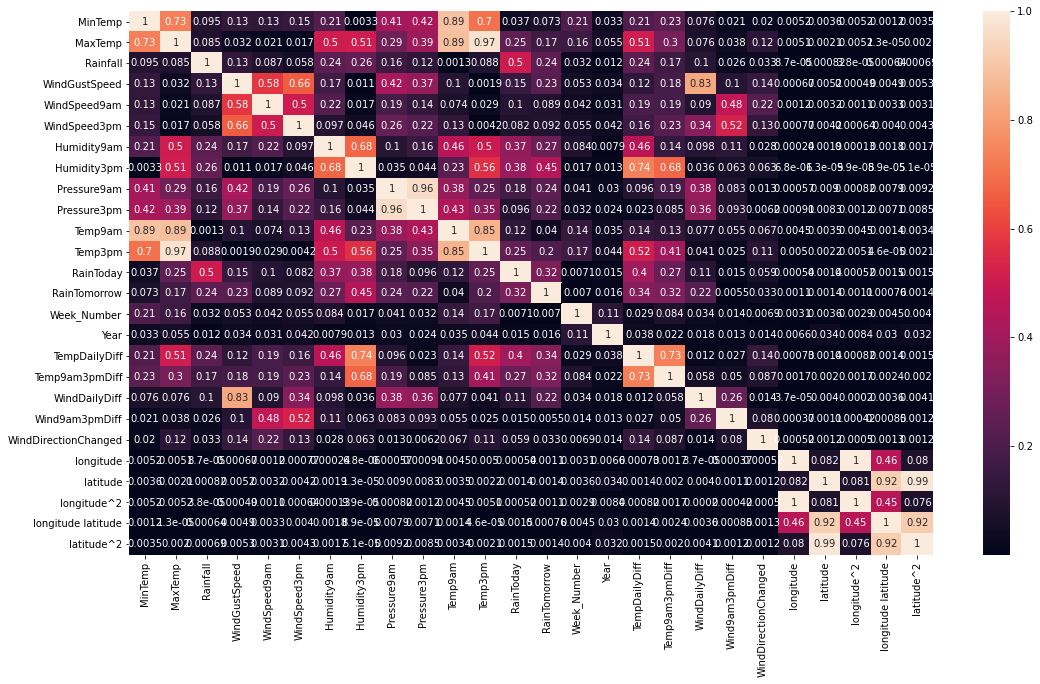

In [57]:
matrix = chosen_dataset.corr()
matrix
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(matrix.abs(), annot = True)

In [58]:
G = nx.Graph()
for i in matrix.columns:
    print(i)
    G.add_node(i)
pos = nx.circular_layout(G)
for i in matrix.columns:
    for j in matrix.columns:
        if i != j and matrix[i][j] != 'nan' and abs(matrix[i][j]) > 0.50 :
            G.add_edge(i, j)
            
edge_x = []
edge_y = []
weights = []
edge_trace = []
for edge in G.edges:
    print(edge)
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    
    trace = go.Scatter(x = [x0, x1, None],
                       y = [y0, y1, None],
                       line = dict(width = (abs(matrix[edge[0]][edge[1]])**10+0.5),
                                   color = 'blue' if matrix[edge[0]][edge[1]] > 0 else 'red',
                                   dash= 'solid' if matrix[edge[0]][edge[1]] > 0 else 'dot'),
                       hoverinfo = 'none',
                       mode = 'lines',
                       line_shape='spline')
    edge_trace.append(trace)
    
node_x = []
node_y = []
for node in pos:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
            color='LightSkyBlue',
            size=20,
    )
)

node_text = []
for node in G.nodes():
    node_text.append(node)
node_trace.text = node_text

fig = go.Figure(data=[node_trace],
             layout=go.Layout(
                title='<br>Correlations between chosen attributes',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=4),
                autosize=False,
                width=1000,
                height=1000,
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
for trace in edge_trace:
    fig.add_trace(trace)
fig.show()

MinTemp
MaxTemp
Rainfall
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm
RainToday
RainTomorrow
Week_Number
Year
TempDailyDiff
Temp9am3pmDiff
WindDailyDiff
Wind9am3pmDiff
WindDirectionChanged
longitude
latitude
longitude^2
longitude latitude
latitude^2
('MinTemp', 'MaxTemp')
('MinTemp', 'Temp9am')
('MinTemp', 'Temp3pm')
('MaxTemp', 'Humidity9am')
('MaxTemp', 'Humidity3pm')
('MaxTemp', 'Temp9am')
('MaxTemp', 'Temp3pm')
('MaxTemp', 'TempDailyDiff')
('Rainfall', 'RainToday')
('WindGustSpeed', 'WindSpeed9am')
('WindGustSpeed', 'WindSpeed3pm')
('WindGustSpeed', 'WindDailyDiff')
('WindSpeed9am', 'WindSpeed3pm')
('WindSpeed3pm', 'Wind9am3pmDiff')
('Humidity9am', 'Humidity3pm')
('Humidity3pm', 'Temp3pm')
('Humidity3pm', 'TempDailyDiff')
('Humidity3pm', 'Temp9am3pmDiff')
('Pressure9am', 'Pressure3pm')
('Temp9am', 'Temp3pm')
('Temp3pm', 'TempDailyDiff')
('TempDailyDiff', 'Temp9am3pmDiff')
('longitude', 'longitude^2')
('latitude', 'longitude

In [59]:
what = 'RainTomorrow'
winds = chosen_dataset.groupby('WindDir9am')[what].mean()
winds = winds.reindex(['N','NNE','NE','ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW' ,'NNW'])
winds = pd.DataFrame({'WindDir9am':winds.index, what:winds.values})

#winds

In [60]:
fig = px.bar_polar(winds, r=what, theta='WindDir9am',
                   template="plotly_dark",
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()
